In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydotplus
import os
import math
import seaborn as sns
from pandas.plotting import scatter_matrix
from itertools import product
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import model_selection, preprocessing, metrics
from sklearn.metrics import classification_report,confusion_matrix

headers = ['Wife_Age', 'Wife_Education',
          'Husband_Education', 'Children_Born',
          'Wife_Religion', 'Wife_Working',
          'Husband_Occupation','SOL_Index',
          'Media_Exposure','Contraceptive_Method_Used']

dataset = pd.read_csv("C:\\Users\\Li-Wei\\Desktop\\data mining\\Machine_Learning\\data\\cmc.data",
                   header = None,
                   names = headers,
                   sep = ',')

#還原資料初始值
dataset_raw = dataset.copy()

lowtohigh = { 1: "most_low", 2: "low", 3:"high", 4:"most_high"}
dataset_raw.Wife_Education.replace(lowtohigh, inplace=True)
dataset_raw.Husband_Education.replace(lowtohigh, inplace=True)
dataset_raw.SOL_Index.replace(lowtohigh, inplace=True)
dataset_raw.Husband_Occupation.replace(lowtohigh, inplace=True)

wifereligion = {0:"Non_Islam", 1:"Islam"}
dataset_raw.Wife_Religion.replace(wifereligion, inplace=True)

wifeworking = {0:"Yes", 1:"No"}
dataset_raw.Wife_Working.replace(wifeworking, inplace=True)

mediaexposure = {0: "Good", 1: "Not_Good"}
dataset_raw.Media_Exposure.replace(mediaexposure, inplace=True)

contraceptive = {1: "No_Use", 2:"Long_Term", 3:"Short_Term"}
dataset_raw.Contraceptive_Method_Used.replace(contraceptive, inplace=True)

dataset_raw.head()


,Wife_Age,Wife_Education,Husband_Education,Children_Born,Wife_Religion,Wife_Working,Husband_Occupation,SOL_Index,Media_Exposure,Contraceptive_Method_Used
0,24,low,high,3,Islam,No,low,high,Good,No_Use
1,45,most_low,high,10,Islam,No,high,most_high,Good,No_Use
2,43,low,high,7,Islam,No,high,most_high,Good,No_Use
3,42,high,low,9,Islam,No,high,high,Good,No_Use
4,36,high,high,8,Islam,No,high,low,Good,No_Use


In [11]:
dataset_raw.describe(include=['O'])

,Wife_Education,Husband_Education,Wife_Religion,Wife_Working,Husband_Occupation,SOL_Index,Media_Exposure,Contraceptive_Method_Used
count,1473,1473,1473,1473,1473,1473,1473,1473
unique,4,4,2,2,4,4,2,3
top,most_high,most_high,Islam,No,high,most_high,Good,No_Use
freq,577,899,1253,1104,585,684,1364,629


In [12]:
#量化後的資料集
#將"Long_Term"和"Short_Term"合併成"Yes_Use"
contraceptive = {1: 1, 2: 2, 3: 2}
dataset.Contraceptive_Method_Used.replace(contraceptive, inplace=True)
dataset.head()

,Wife_Age,Wife_Education,Husband_Education,Children_Born,Wife_Religion,Wife_Working,Husband_Occupation,SOL_Index,Media_Exposure,Contraceptive_Method_Used
0,24,2,3,3,1,1,2,3,0,1
1,45,1,3,10,1,1,3,4,0,1
2,43,2,3,7,1,1,3,4,0,1
3,42,3,2,9,1,1,3,3,0,1
4,36,3,3,8,1,1,3,2,0,1


In [13]:
dataset_merge = dataset.copy()

lowtohigh = { 1: "most_low", 2: "low", 3:"high", 4:"most_high"}
dataset_merge.Wife_Education.replace(lowtohigh, inplace=True)
dataset_merge.Husband_Education.replace(lowtohigh, inplace=True)
dataset_merge.SOL_Index.replace(lowtohigh, inplace=True)
dataset_merge.Husband_Occupation.replace(lowtohigh, inplace=True)

wifereligion = {0:"Non_Islam", 1:"Islam"}
dataset_merge.Wife_Religion.replace(wifereligion, inplace=True)

wifeworking = {0:"Yes", 1:"No"}
dataset_merge.Wife_Working.replace(wifeworking, inplace=True)

mediaexposure = {0: "Good", 1: "Not_Good"}
dataset_merge.Media_Exposure.replace(mediaexposure, inplace=True)

contraceptive = {1: "No_Use", 2:"Yes_Use"}
dataset_merge.Contraceptive_Method_Used.replace(contraceptive, inplace=True)

dataset_merge.head()


,Wife_Age,Wife_Education,Husband_Education,Children_Born,Wife_Religion,Wife_Working,Husband_Occupation,SOL_Index,Media_Exposure,Contraceptive_Method_Used
0,24,low,high,3,Islam,No,low,high,Good,No_Use
1,45,most_low,high,10,Islam,No,high,most_high,Good,No_Use
2,43,low,high,7,Islam,No,high,most_high,Good,No_Use
3,42,high,low,9,Islam,No,high,high,Good,No_Use
4,36,high,high,8,Islam,No,high,low,Good,No_Use


In [14]:
dataset_merge.to_csv('dataset_merge.csv', index=False)

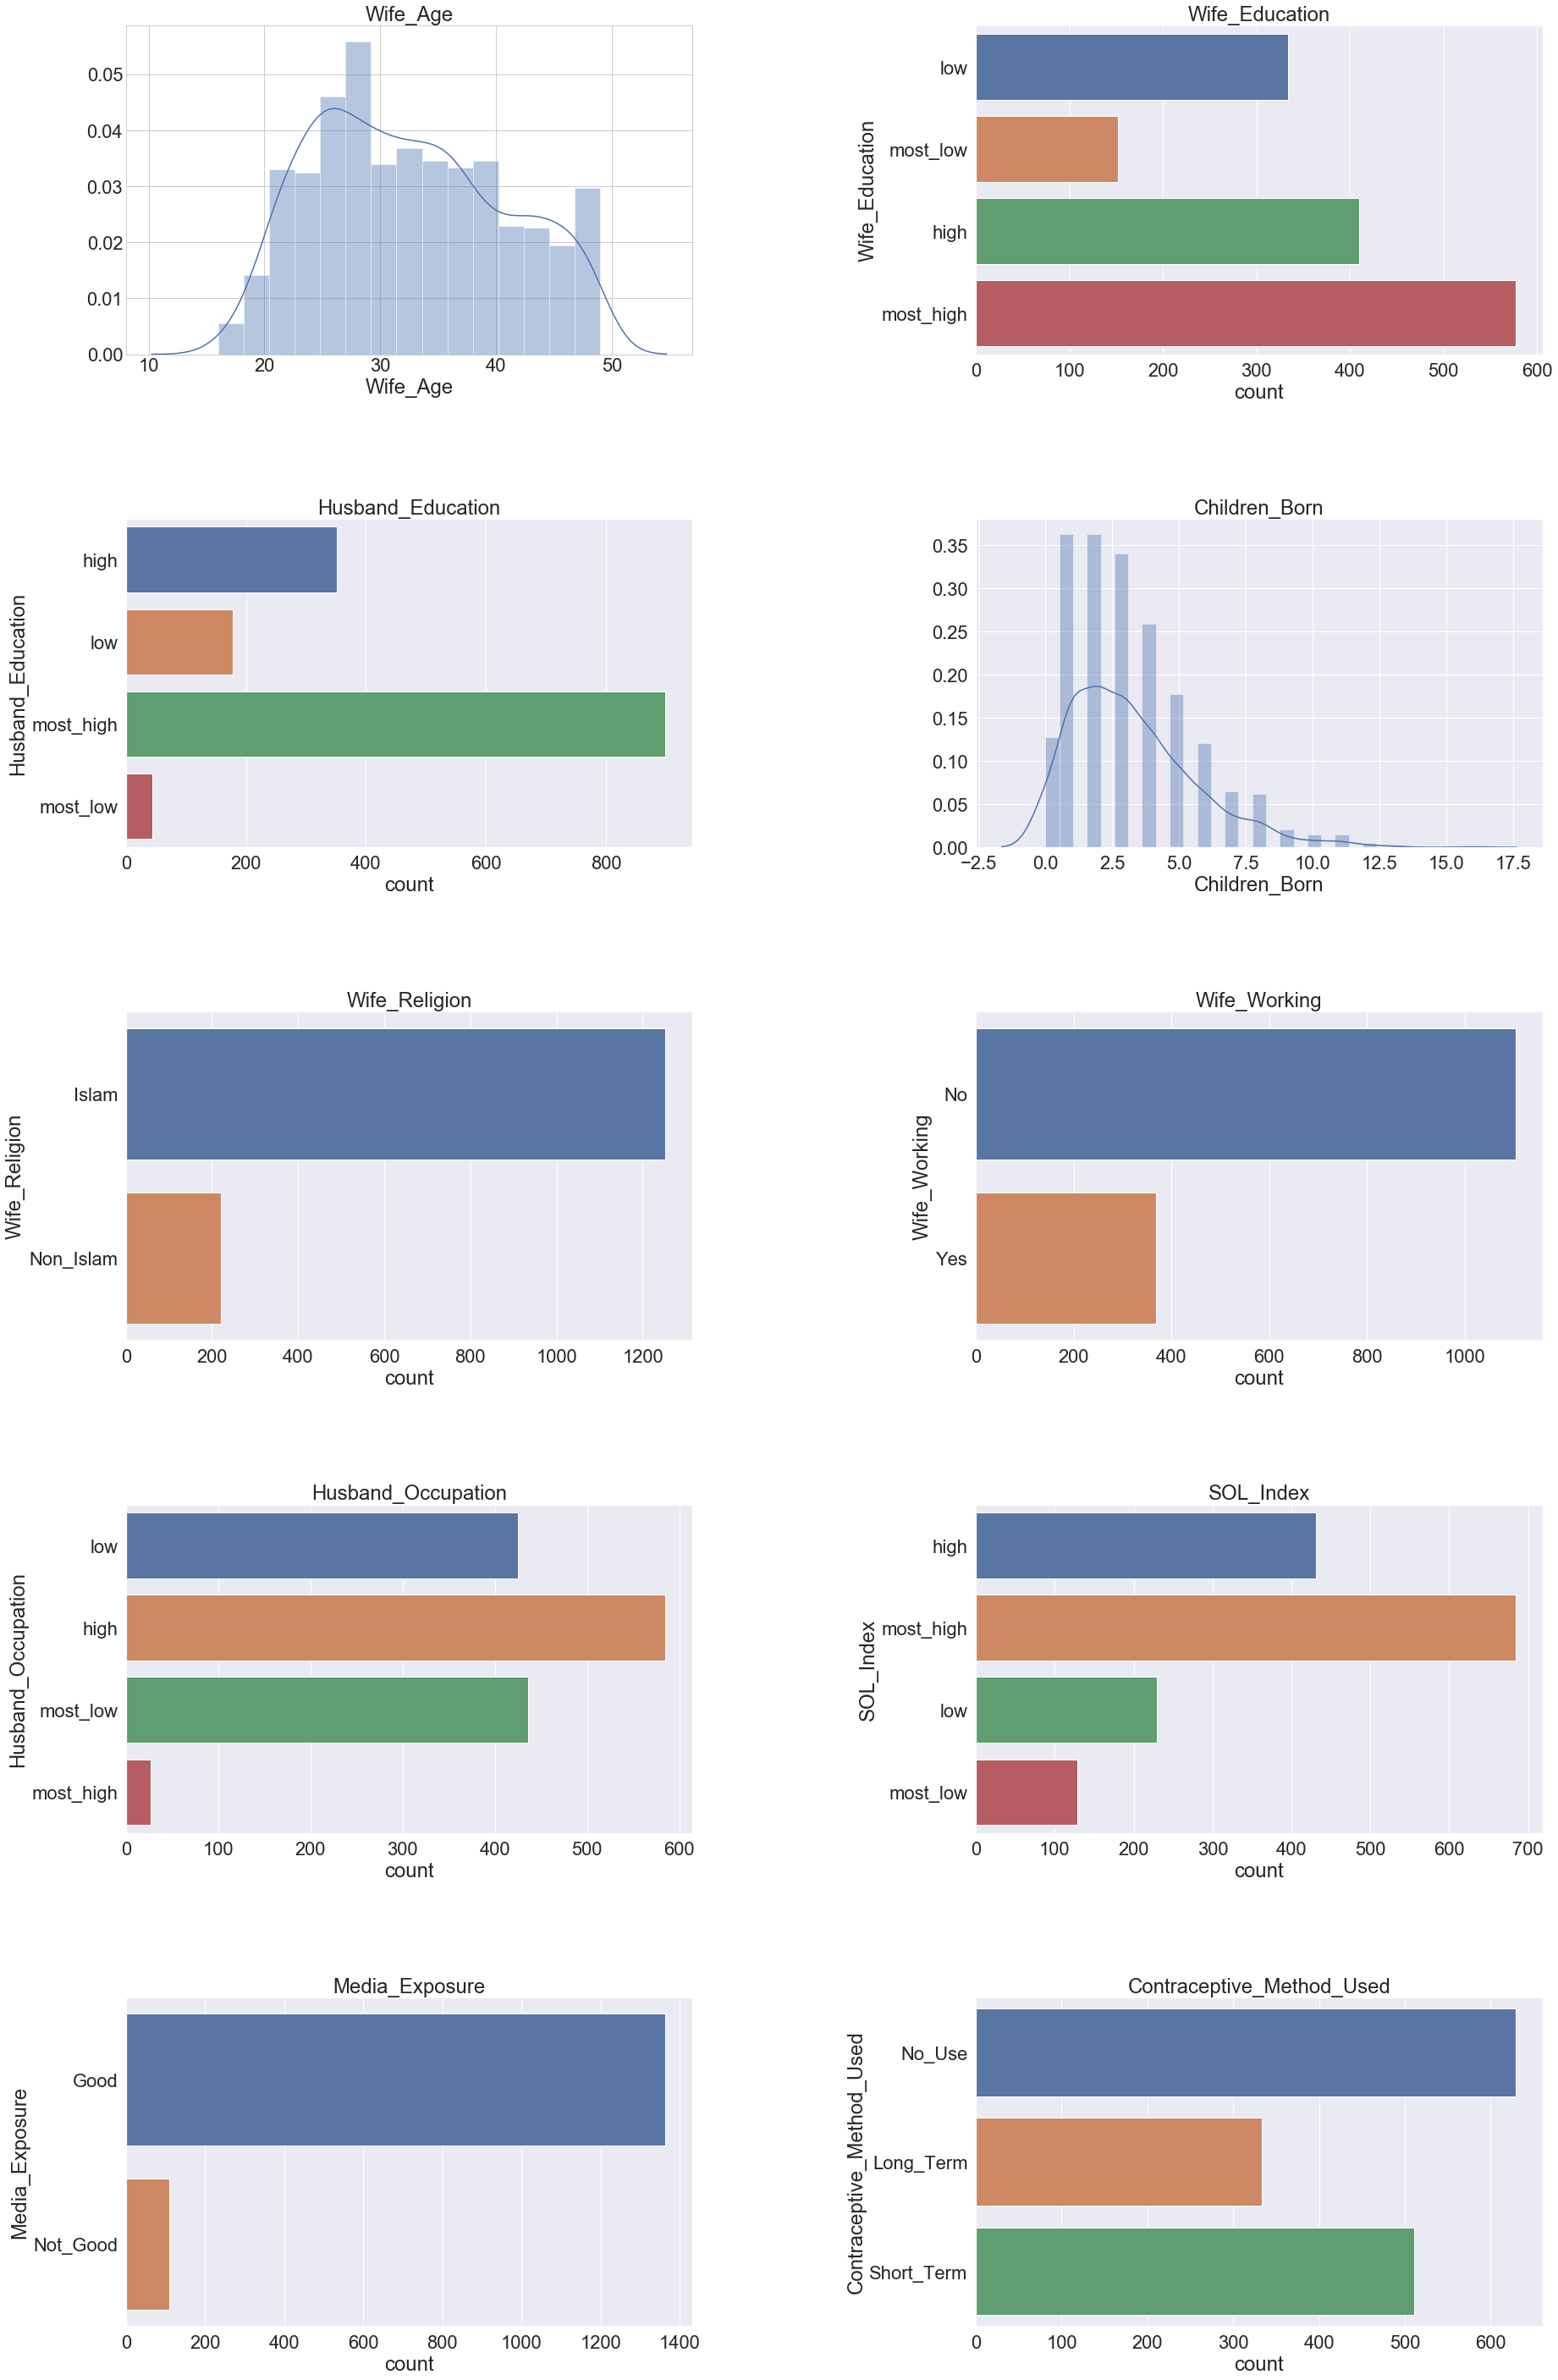

In [15]:
def plot_distribution(dataset, cols=2, width=30, height=50, hspace=0.5, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width, height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1])/cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i+1)
        ax.set_title(column)
        sns.set(font_scale=2)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:20] for s in g.get_yticklabels()]
            g.set(yticklabels = substrings)
            #sns.set(font_scale=2)
            #plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            #plt.xticks(rotation=25)

            
plot_distribution(dataset_raw)
plt.savefig('C:\\Users\\Li-Wei\\Desktop\\data mining\\Machine_Learning\\data\\資料統計圖.png')#儲存圖片

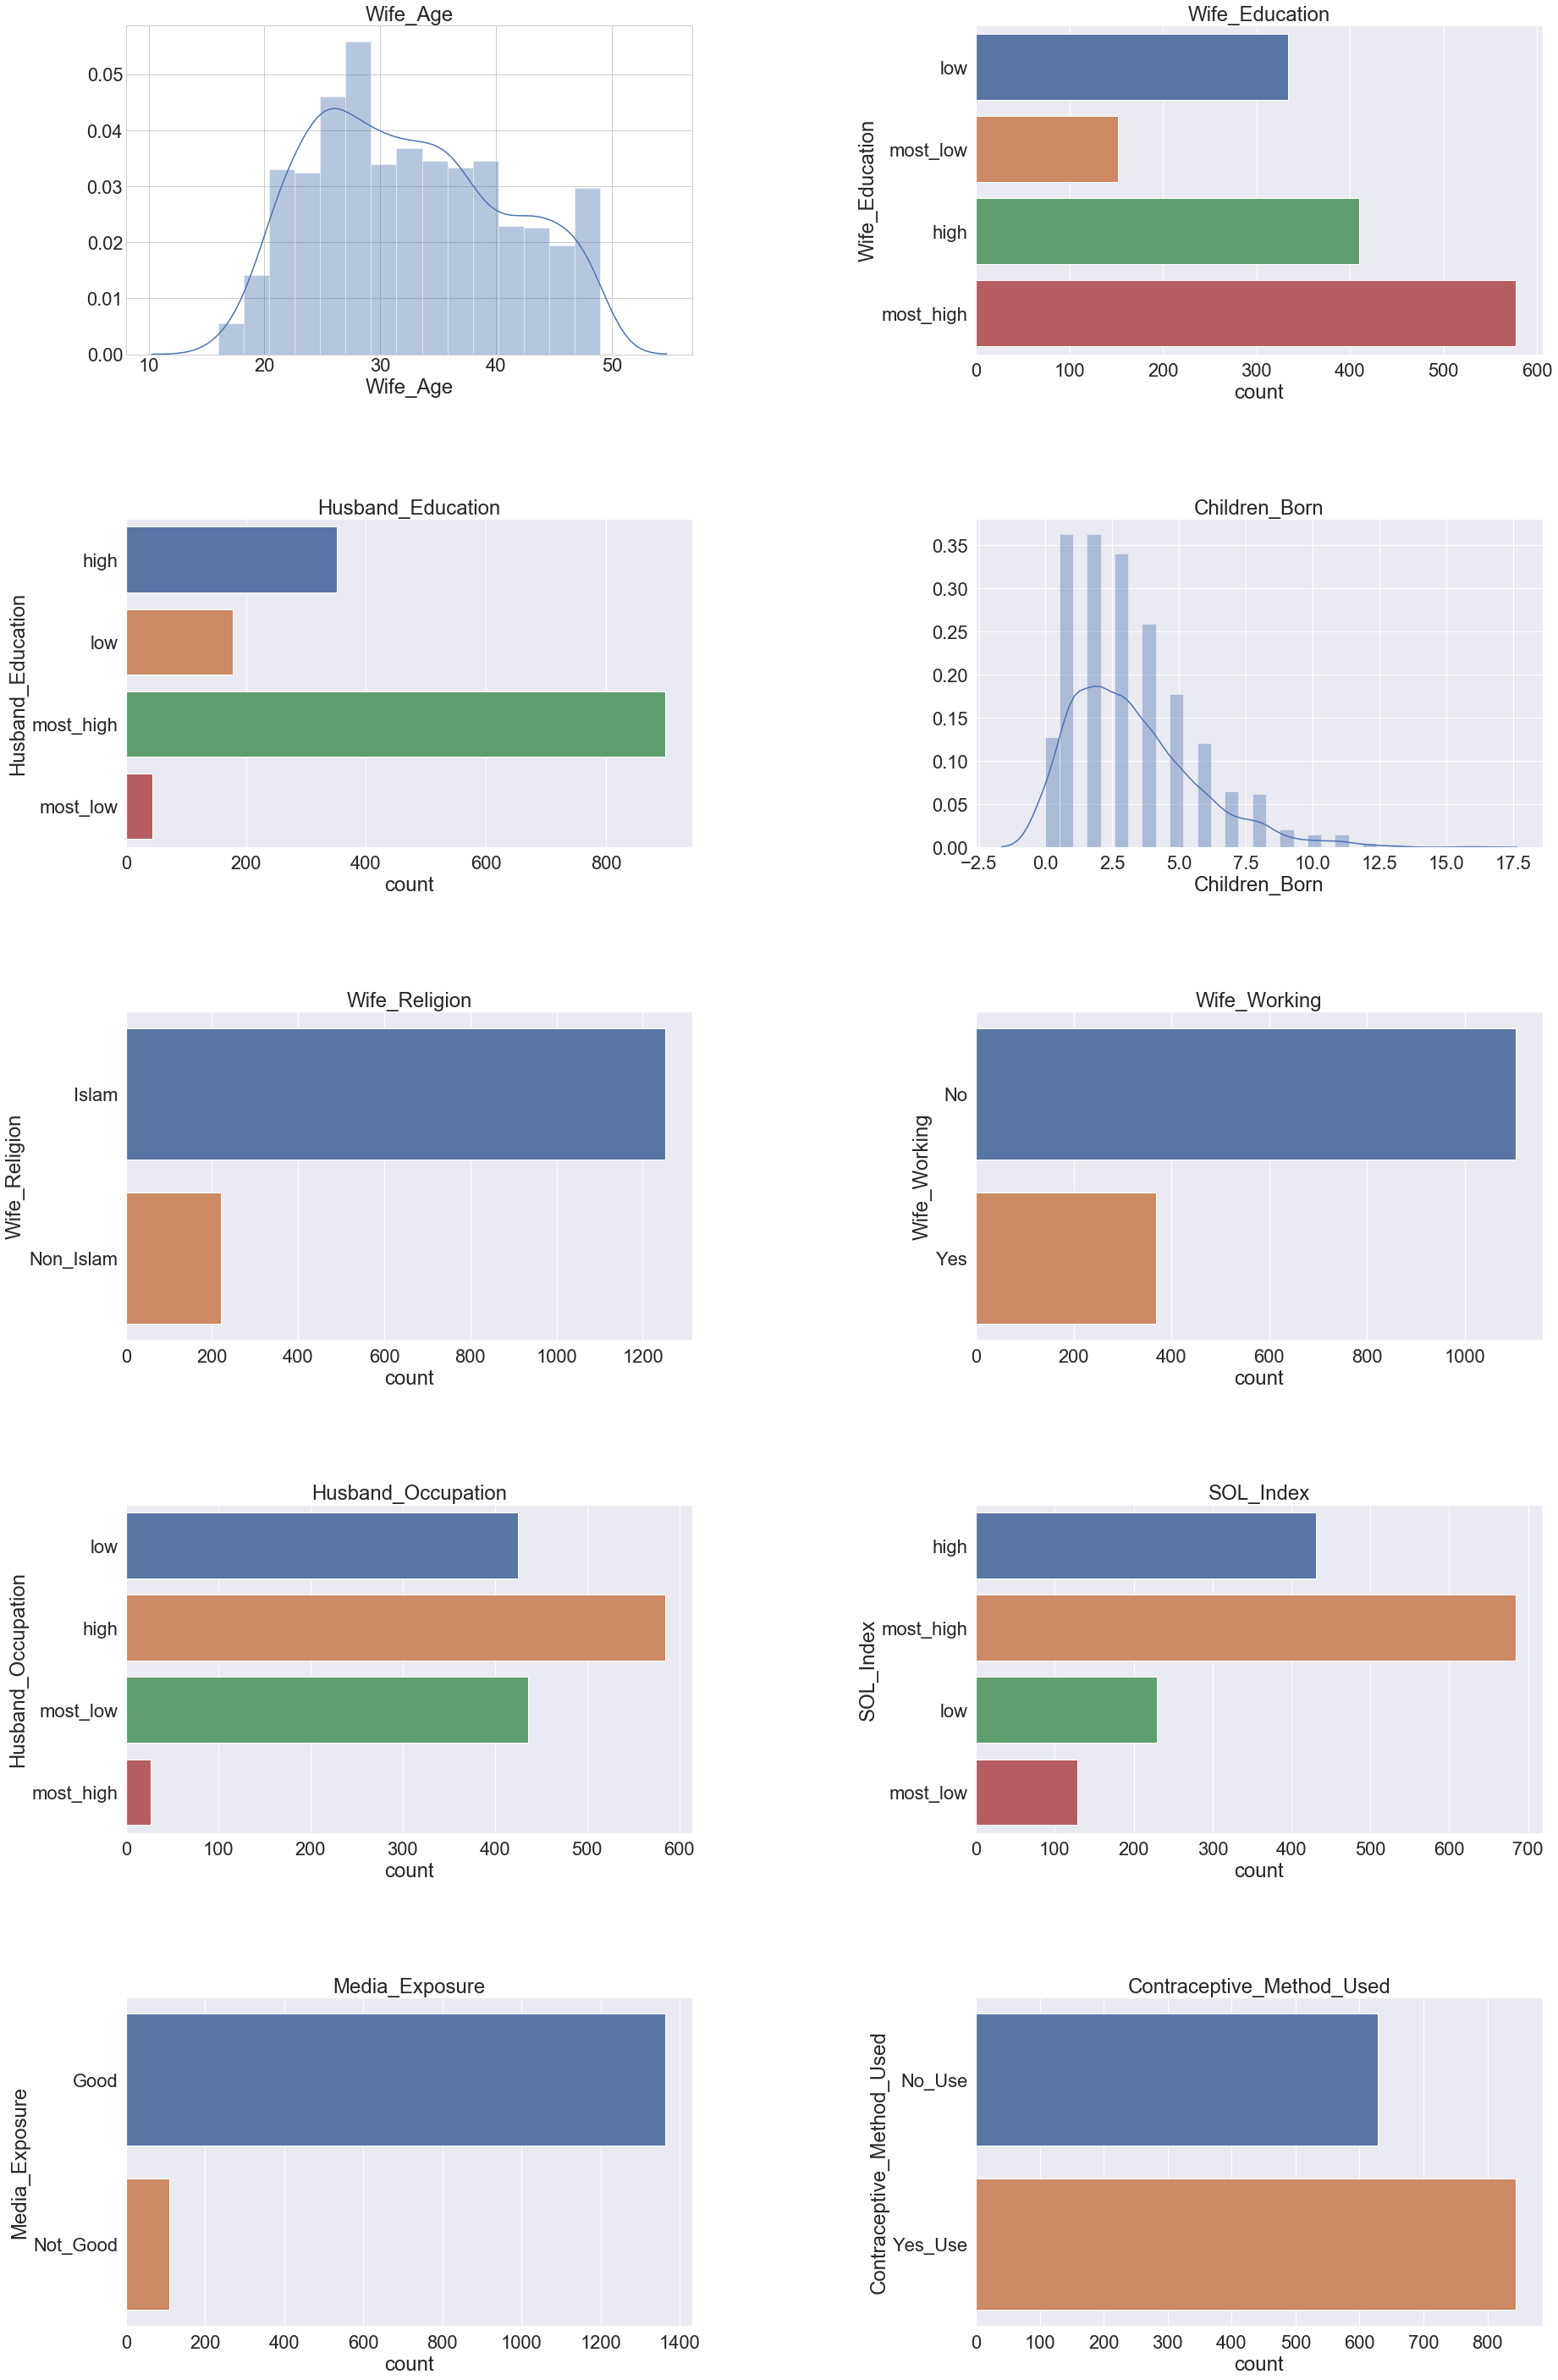

In [16]:
plot_distribution(dataset_merge)
plt.savefig('C:\\Users\\Li-Wei\\Desktop\\data mining\\Machine_Learning\\data\\資料統計圖(class合併).png')

In [17]:
from sklearn.preprocessing import StandardScaler
#標準化數據
sc = StandardScaler()
sc.fit(dataset.drop('Contraceptive_Method_Used',axis=1))
sc_features = sc.transform(dataset.drop('Contraceptive_Method_Used',axis=1))
dataset_feat = pd.DataFrame(sc_features,columns=dataset.columns[:-1])
dataset_feat.head()

,Wife_Age,Wife_Education,Husband_Education,Children_Born,Wife_Religion,Wife_Working,Husband_Occupation,SOL_Index,Media_Exposure
0,-1.038167,-0.944748,-0.526590,-0.110856,0.419021,0.578134,-0.159403,-0.137053,-0.282687
1,1.515194,-1.930310,-0.526590,2.858078,0.419021,0.578134,0.997250,0.887716,-0.282687
2,1.272017,-0.944748,-0.526590,1.585678,0.419021,0.578134,0.997250,0.887716,-0.282687
3,1.150428,0.040814,-1.751973,2.433945,0.419021,0.578134,0.997250,-0.137053,-0.282687
4,0.420897,0.040814,-0.526590,2.009811,0.419021,0.578134,0.997250,-1.161823,-0.282687


In [18]:
from sklearn.model_selection import train_test_split
#切割訓練資料
X = dataset_feat
y = dataset['Contraceptive_Method_Used']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=101)

In [21]:
#Decision Tree
os.environ["PATH"] += os.pathsep + 'C:\\Program Files (x86)\\Graphviz2.38\\bin'

dtree = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=1028)
model_tree = dtree.fit(X_train, y_train)

X_featurte =['Wife_Age', 'Wife_Education',
             'Husband_Education', 'Children_Born',
             'Wife_Religion', 'Wife_Working',
             'Husband_Occupation','SOL_Index',
             'Media_Exposure']
y_class =["No_Use","Yes_Use"]

#畫出決策樹PDF
draw_tree = tree.export_graphviz(model_tree, out_file=None,
                                 feature_names= X_featurte,
                                 class_names=y_class ,
                                 filled=True, rounded=True,  
                                 special_characters=True)

graph = pydotplus.graph_from_dot_data(draw_tree)

graph.write_pdf("entropy_maxdepth5.pdf")

True

In [29]:
y_train

452     2
559     2
766     2
876     2
1059    1
       ..
1417    2
75      1
599     2
1361    2
863     2
Name: Contraceptive_Method_Used, Length: 1031, dtype: int64

In [30]:
y_test

212     1
545     2
236     1
115     1
1163    1
       ..
1407    2
637     2
1334    2
959     2
708     2
Name: Contraceptive_Method_Used, Length: 442, dtype: int64

In [23]:
#Decision Tree 績效
pred = model_tree.predict(X_test)
print('Decision Tree: Entropy, max_depth=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print("Accuracy: %s " % round(metrics.accuracy_score(y_test, pred)*100,2),"%")
print("\n==============================================================\n")
print(classification_report(y_test,pred))

Decision Tree: Entropy, max_depth=5


[[107  90]
 [ 45 200]]


Accuracy: 69.46  %


              precision    recall  f1-score   support

           1       0.70      0.54      0.61       197
           2       0.69      0.82      0.75       245

    accuracy                           0.69       442
   macro avg       0.70      0.68      0.68       442
weighted avg       0.70      0.69      0.69       442



In [32]:
# k-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print('WITH K=default')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print("Accuracy: %s " % round(metrics.accuracy_score(y_test, pred)*100,2),"%")
print("\n==============================================================\n")
print(classification_report(y_test,pred))

WITH K=default


[[ 90 107]
 [ 53 192]]


Accuracy: 63.8  %


              precision    recall  f1-score   support

           1       0.63      0.46      0.53       197
           2       0.64      0.78      0.71       245

    accuracy                           0.64       442
   macro avg       0.64      0.62      0.62       442
weighted avg       0.64      0.64      0.63       442



Text(0, 0.5, 'Error Rate')

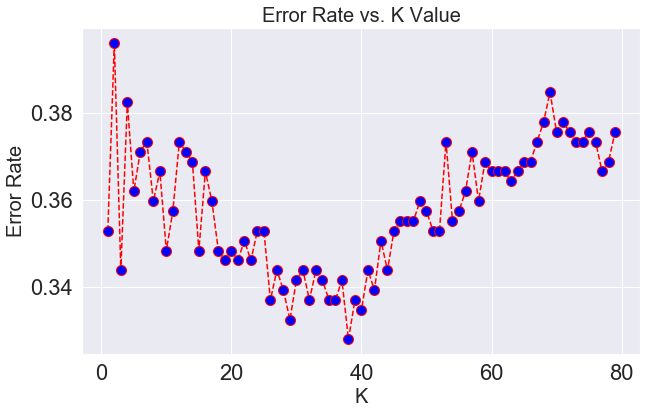

In [33]:
error_rate = []

for i in range(1,80):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

#k=1~80的錯誤率
plt.figure(figsize=(10,6))
plt.plot(range(1,80),error_rate,color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate vs. K Value', fontsize=20)
plt.xlabel('K', fontsize=20)
plt.ylabel('Error Rate', fontsize=20)

In [34]:
knn = KNeighborsClassifier(n_neighbors=38)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=38')
print('\n')
print(confusion_matrix(y_test, pred))
print('\n')
print("Accuracy: %s " % round(metrics.accuracy_score(y_test, pred)*100,2),"%")
print("\n==============================================================\n")
print(classification_report(y_test, pred))

WITH K=38


[[ 77 120]
 [ 25 220]]


Accuracy: 67.19  %


              precision    recall  f1-score   support

           1       0.75      0.39      0.52       197
           2       0.65      0.90      0.75       245

    accuracy                           0.67       442
   macro avg       0.70      0.64      0.63       442
weighted avg       0.70      0.67      0.65       442



In [36]:
best_score = 0.0 
best_k = -1 
for i in range(1,80):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.score(X_test, y_test)
    if pred_i > best_score:
        best_k = i
        best_score = pred_i
print("best_k = ", best_i)
print("best_score", best_score)

best_k =  38
best_score 0.6719457013574661
